todo: when building validation dataset, research the yrSold and MonthSold of the test dataset.

# Data Loading

In [2]:
from utils import load_house_prices_data
from constants import *
from constant_extracted import *
import matplotlib.pyplot as plt

housing_train = load_house_prices_data(source='train')
housing_test = load_house_prices_data(source='test')

# ydata-profiling (not Working)

In [4]:
from ydata_profiling import ProfileReport

# profile = ProfileReport(housing_train, title = 'Housing report')
# 
# profile.to_file('housing_profile_report.html')

# OverallQual vs Sale Price
we saw that 'OverallQual' had the greatest correlation to sale price. How do they look like together?

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

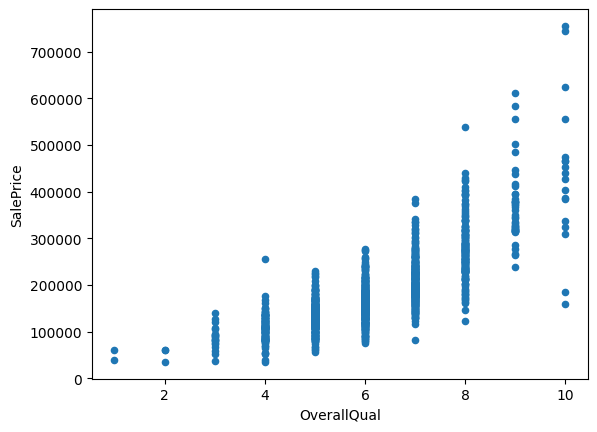

In [14]:
# housing_train.sort_values(by='SalePrice').plot(kind='scatter', x='Neighborhood', y='SalePrice')
housing_train.plot(kind='scatter', x='OverallQual', y='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='GarageYrBlt'>

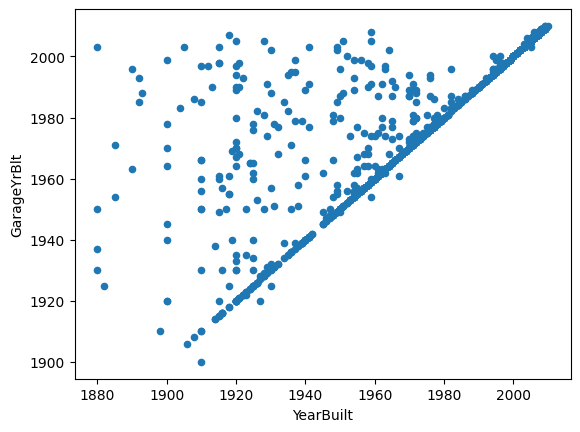

In [15]:
housing_train.plot(kind='scatter', x='YearBuilt', y='GarageYrBlt')

# How does the price per area behaves?

Text(0.5, 0, 'Price divided by Total Area')

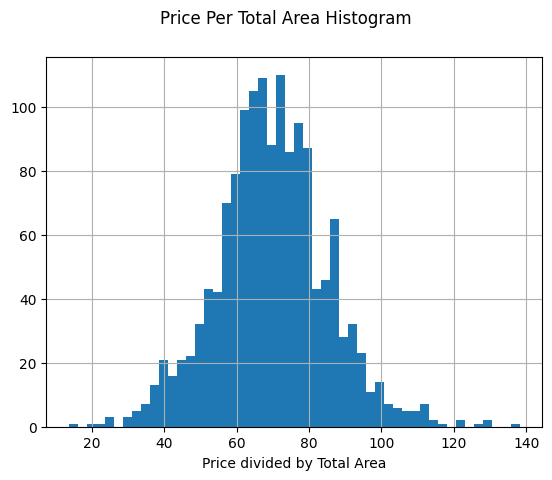

In [11]:
from feature_extraction import join_liv_bsmt_areas

train_w_total_area = join_liv_bsmt_areas(housing_train)
train_w_total_area['PricePerArea'] = (train_w_total_area[SalePrice]/train_w_total_area[TotalArea])
train_w_total_area['PricePerArea'].hist(bins=50)
plt.suptitle('Price Per Total Area Histogram')
plt.xlabel('Price divided by Total Area')

# How does the price per area behave per neighborhood and MSsubclass?

C:\ProgramData\miniconda3\envs\py4dp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Price divided by Total Area')

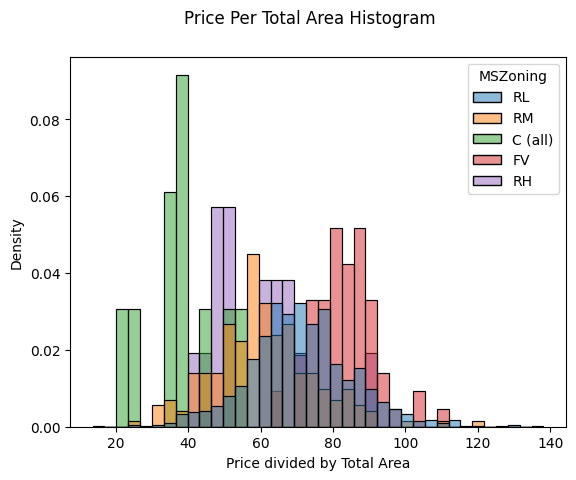

In [14]:
from feature_extraction import join_liv_bsmt_areas
import seaborn as sns

train_w_total_area = join_liv_bsmt_areas(housing_train)
train_w_total_area['PricePerArea'] = (train_w_total_area[SalePrice]/train_w_total_area[TotalArea])
sns.histplot(data=train_w_total_area, x='PricePerArea', hue=MSZoning, stat='density', common_norm=False)
plt.suptitle('Price Per Total Area Histogram')
plt.xlabel('Price divided by Total Area')

# Exploring Test Data

<Axes: xlabel='YrSold,MoSold'>

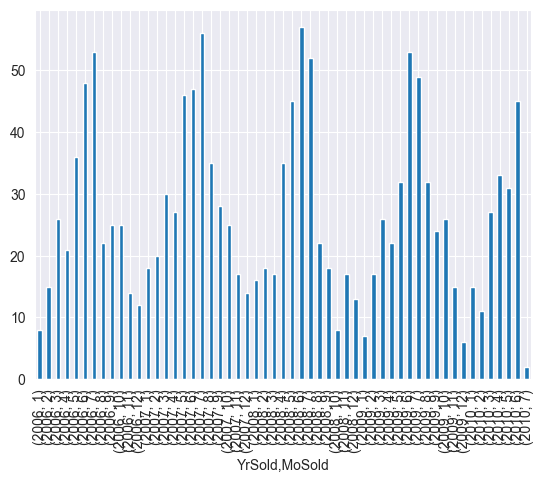

In [19]:
housing_test.groupby(by=[YrSold, MoSold]).size().plot(kind='bar')